# Week 3 - Data Visualization using Matplotlib and Seaborn

## Learning Objective
+ Importing modules in Google Colab from git
+ Introduction to Matplotlib
    + Understanding parts of a figure
    + Introduction to pyplot
    + Working with multiple plots
+ Introduction to Seaborn
    + Overview of plotting functionality
    + Error bars and distribution summaries
    + Visualizing categorical data
    + Visualizing multivariate data
+ Visualizing Geographic Data

The contents of this tutorial are based on [matplotlib tutorial](https://matplotlib.org/tutorials/index.html), [seaborn tutorial](https://seaborn.pydata.org/tutorial/function_overview.html), another [seaborn tutorial](https://seaborn.pydata.org/introduction.html) and "Data Analysis and Visualization  Using Python" by Dr. Ossama Embarak. In the quiz later on, we make use of the seaborn [dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) by Michael Waskom. 

# Importing modules in Google Colab from git


If someone else uploads their code in github, we can use ```! git clone``` to clone it into Google Colaboratory, then run it.

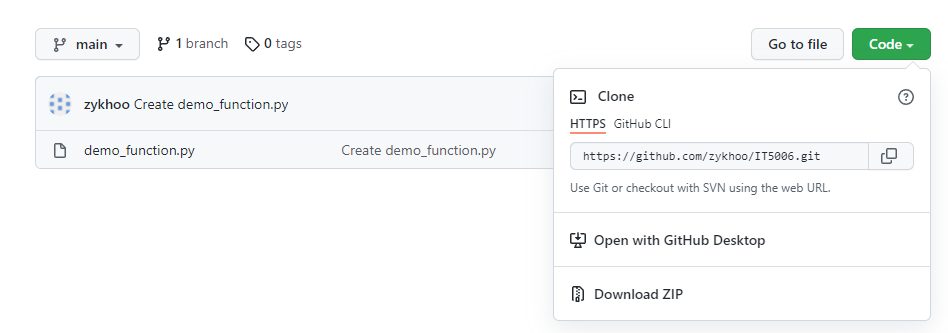

In [1]:
! git clone https://github.com/zykhoo/IT5006.git

Cloning into 'IT5006'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


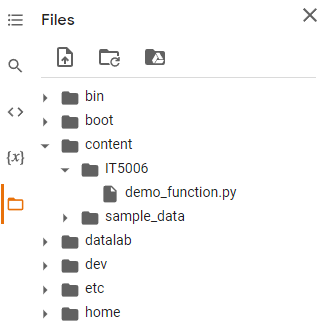

In [2]:
import sys
sys.path.insert(0,'/content/IT5006/')

from demo_function import *
pretty_print(5)

the value is 5


15

# Loading dataset

Let us use a classic dataset - a waiter's tips dataset. We can load the csv using pandas.

In [3]:
from google.colab import drive
drive.mount('/content/drive') # alternative is to drag and drop to google colab

Mounted at /content/drive


In [4]:
import pandas as pd

tips = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT5006/Week 3/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Introduction to Matplotlib

Matplotlib is a Python plotting library that produces high-quality figures in a variety of formats and across platforms. In matplotlib, you can add features one by one, such as adding a title, labels, legends, and more.

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). 

## Understanding parts of a figure
Let us understand the components of a matplotlib figure to better understand all the terms.

<img src = "https://matplotlib.org/_images/anatomy.png" width="600"/>

## Introduction to Pyplot

The easiest way to create a new figure is with pyplot. The ```matplotlib.pyplot``` provides a collection of functions which make some change to a figure, e.g. creating a figure, creating a plotting area in a figure, plotting some lines, etc. 

It is important to note that all the plotting functions expect numpy array as input. Classes that are 'array-like' such as pandas data objects and ```numpy.matrix``` may or may not work as intended. It is best to convert these to numpy array objects prior to plotting.

For Jupyter notebooks, we set ```%matplotlib inline``` to output the plotting commands inline in our notebooks.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

## A basic line plot

We can create a plot of functions of y versus x, a range of 0 to 10, as lines or markers. We then (1) add labels (2) add x and y axis labels (3) add grids.

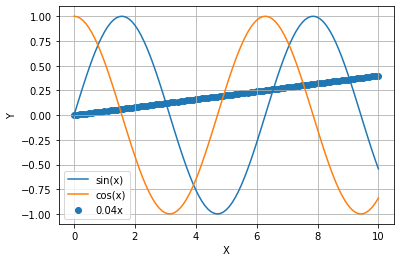

z


In [13]:
import numpy as np
x = np.linspace(0,10,101)
plt.plot(x, np.sin(x), label= "sin(x)")
plt.plot(x, [np.cos(i) for i in x], label= "cos(x)")
plt.scatter(x, [i*0.04 for i in x], label ="0.04x")
plt.legend()
plt.ylabel("Y")
plt.xlabel("X")
plt.grid()
plt.show()
print("z")

### Line Plot

Let us now work on the tips dataset using a Dataframe. We aggregate the total bill, tips collected and group size per day. We can then try to see if there is a relationship between the tips collected and the day of the week. 

In [14]:
tipsbyday = tips.groupby("day", sort=False).mean()
tipsbyday

,total_bill,tip,size
day,,,
Sun,21.410000,3.255132,2.842105
Sat,20.441379,2.993103,2.517241
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263


We conform this new Dataframe to a new index using reindex

In [15]:
tipsbyday = tipsbyday.reindex(["Thur","Fri","Sat","Sun"])
tipsbyday

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


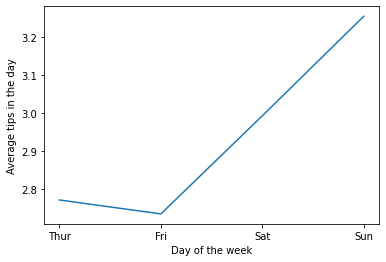

In [16]:
plt.plot(tipsbyday.index, tipsbyday['tip'].values)
plt.xlabel('Day of the week')
plt.ylabel('Average tips in the day')
plt.show()

We see that the average tips collected by the waiter decrease before the weekend, and increases during the weekend, which is a considerably expected trend. 

### Scatterplot
A scatter plot shows the relationship between two factors of an experiment. A trend line is used to determine positive, negative, or no correlation. We can create a scatterplot using the original tips dataset to view the relation between the total bill and the tips in the dataset. A line plot does not suit in this case, as we do not want to see a trend.

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


We directly plot the scatterplot using the ```tips``` Dataframe

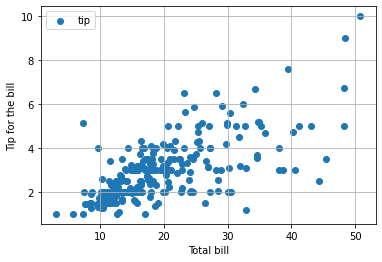

In [18]:
fig, ax = plt.subplots()

ax.scatter('total_bill','tip', data=tips) 
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip for the bill')
ax.legend()
ax.grid(True)

plt.show()

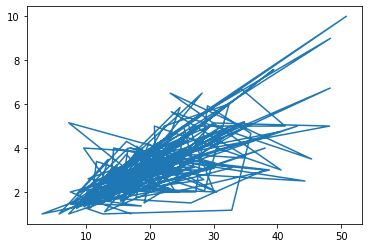

In [19]:
plt.plot('total_bill','tip', data=tips) # this does not make sense

We can make the graph above more informative. We  can plot categorical data using scatterplots, and add the detail of whether the person smoked or not using color. We use one color to denote that a person smokes, and another to denote that the person does not smoke.

We plot the scatterplot using the ```tips``` Dataframe and its labels (more information here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html under the data argument)


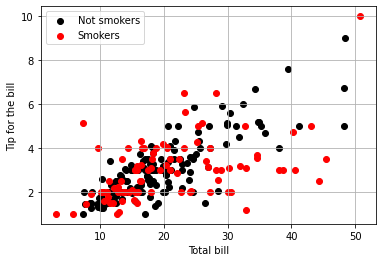

In [25]:
fig, ax = plt.subplots()

# ax.scatter('total_bill','tip', data=tips) 
ax.scatter('total_bill','tip', c= "Black", label="Not smokers", data=tips[tips["smoker"]=="No"]) 
ax.scatter('total_bill','tip', c= "Red", label="Smokers", data=tips[tips["smoker"]=="Yes"]) 
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip for the bill')
ax.legend()
ax.grid(True)

plt.show()

What if we have many categories? We can use a loop and create one scatter plot per item to appear in the legend and set the label accordingly.

Yes Red
No Black


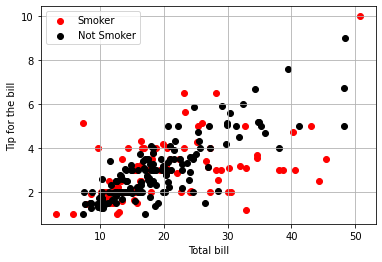

In [26]:
fig, ax = plt.subplots()

class_map = {"Yes":"Smoker","No":"Not Smoker"}
colors = {"Yes":"Red", "No":"Black"}

for cl, c in colors.items():
    print(cl,c)
    ax.scatter('total_bill','tip', c=c, label=class_map[cl], data=tips[tips["smoker"]==cl]) 
    
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip for the bill')
ax.legend()
ax.grid(True)

plt.show()

### Bar Plot

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. Bar plots are useful to see counts of some categorical variables. 

We can visualize the distribution of the size of group of diners, i.e. whether most dined in group of 2, 3, etc. 

In [27]:
groupsize = tips['size'].astype("category")
groupsize = groupsize.value_counts()
groupsize

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

We should convert this data to categories list and height list for plotting the bar graph. We can use numpy arrays to represent the groupsizes.

In [28]:
import numpy as np

sz = np.array(groupsize.index.values)
ht = groupsize.to_numpy()
print(sz)
print(ht)

[2 3 4 5 6 1]
[156  38  37   5   4   4]


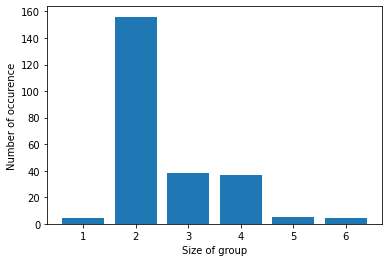

In [29]:
plt.bar(sz, ht)
plt.xlabel("Size of group")
plt.ylabel("Number of occurence")
plt.show()

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Can we create a pie chart to see the proportion of females vs males who paid the bill?

In [34]:
tipsbygender = tips.groupby("sex").count()
tipsbygender

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


([<matplotlib.patches.Wedge at 0x7f043bf56790>,
 [Text(0.47909423581850485, 0.990186201280084, 'Female'),
  Text(-0.47909423581850474, -0.990186201280084, 'Male')],
 [Text(0.26132412862827537, 0.5401015643345912, '35.66'),
  Text(-0.26132412862827525, -0.5401015643345912, '64.34')])

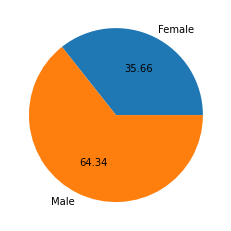

In [40]:
plt.pie(tipsbygender["total_bill"], labels = tipsbygender.index, autopct='%.2f')

## Working with multiple plots

```Pyplot``` has a concept of the current figure and the current axes. All plotting functions apply to the current axes. The function ```gca``` returns the current axes, and ```gcf``` returns the current figure. Normally, you don't have to worry about this, because it is all taken care of behind the scenes. 

We can use the ```plt.subplots()``` function we previously used to manage multiple plots. 

Let us visualize the total bill vs tip plot, but with the contrast of Lunch vs Dinner. Rather than using color, let us use two plots for viewing data for different time of the day.

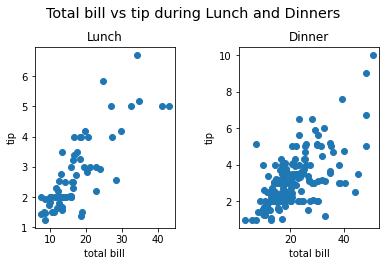

In [48]:
plt.figure()
plt.suptitle("Total bill vs tip during Lunch and Dinners", fontsize="x-large")

plt.subplot(121)
plt.scatter('total_bill','tip', data=tips[tips['time']=="Lunch"])
plt.title("Lunch")
plt.xlabel("total bill")
plt.ylabel("tip")

plt.subplot(122)
plt.scatter('total_bill','tip', data=tips[tips['time']=="Dinner"])
plt.title("Dinner")
plt.xlabel("total bill")
plt.ylabel("tip")

plt.tight_layout(pad =3.0)
plt.show()

# Introduction to Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn is a complement, not a substitute to Matplotlib, but it makes a few-well defined hard tasks easy to do. 


In [49]:
import seaborn as sns

sns.set_theme()

The ```set_theme``` function sets the matplotlib parameters and hence the theme will now apply to all plots using matplotlib - whether plotted through seaborn or not. This is also the default theme.


In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Overview of Plotting Functionality
The seaborn functions can be applied at the axes-level or the figure-level. Axes-level functions plot data onto a single ```matplotlib.pyplot.Axes``` object. Figure-level functions manage a figure, which has various axes-level functions. The organisation of figure-level functions has three modules, called “relational”, “distributional”, and “categorical”. The three achieve similar visualization goals through different means. 

A high-level view of the organization as available in the tutorial website is:
 <img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

### Axes-level objects
We can use an axes-level plot to plot the distribution of total bill for males and females. All this data is plotted onto a single ```matplotlib.pyplot.Axes``` object. 

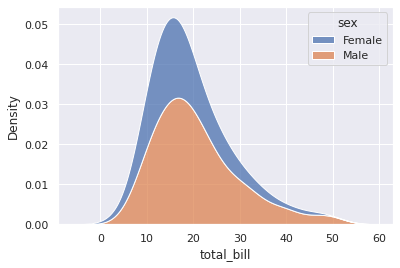

In [52]:
sns.kdeplot(data=tips, x="total_bill", hue="sex", multiple="stack")

We can also easily recreate the plot of tip against total bill that we did previously using matplotlib, albeit with different colors.

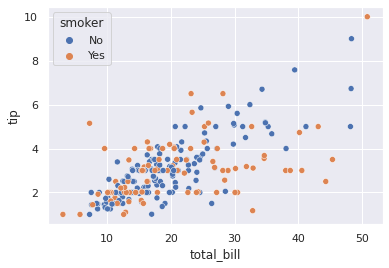

In [53]:
sns.scatterplot(data=tips, x = "total_bill", y = "tip", hue = "smoker")

### Figure-level objects
Alternatively, we can use a figure-level function to plot the visualization of tip vs total bill. Figure-level functions are powerful in visualising several other variables such as the time, presence of smokers, group size, and so on.  

As we know, too much information becomes difficult to understand in a single plot. However, the aim here is to demonstrate how easy it is to create the plot using seaborn.

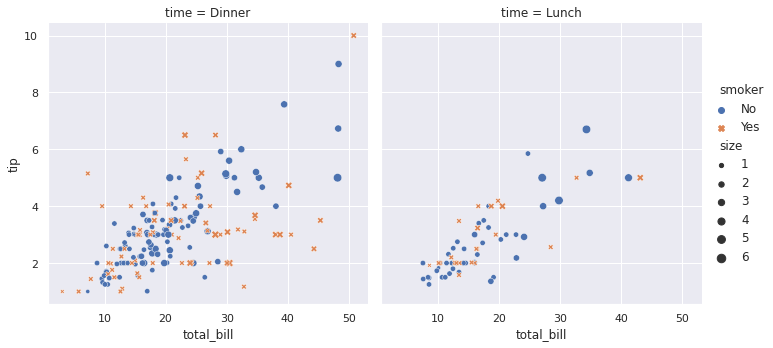

In [59]:
# sns.relplot(data=tips, x="total_bill", y="tip")
# sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")
# sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="smoker")
# sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="smoker", col="time")
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="smoker", col="time", size="size",)

Unlike when using matplotlib directly, it isn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handles the translation from values in the dataframe to arguments that matplotlib understands.

### Other objects for plotting

One plotting function that cannot be cleanly classified as a axes-level or function-level plot is the ```jointplot```. 

```jointplot``` can be used to visualize the joint distribution between total bill and the tip given. The size of the group can also be visualized along with it very easily using seaborn. The ```jointplot``` plots the relationship or joint distribution of two variables (tips and total bill) while adding marginal axes that show the univariate distribution of each one separately.

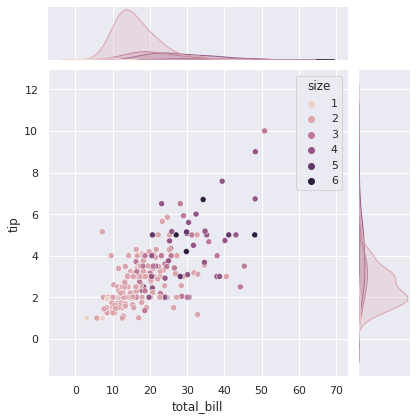

In [60]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="size")

The seaborn heatmap is an axes-level function that is not classified above.

Let us define a new column - percent tip, which is the percentage of the bill which was given as tip. Higher the percent-tip, better tipper the person can be considered. We can then try to do some interesting analysis using this percent-tip.

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
tips['percent_tip'] = tips['tip']*100/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [63]:
def percenttip(tip, totalbill):
  return tip/totalbill*100

tips['percent_tip'] = percenttip(tips['tip'], tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [64]:
def percenttip(df):
  return df["tip"]/df["total_bill"]*100

tips['percent_tip'] = percenttip(tips)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


We can first try to find the correlation between the various numeric data types in the dataset - i.e. are they negatively or positively correlated and how strongly.

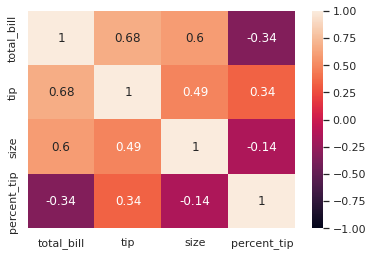

In [65]:
sns.heatmap(tips.corr(), vmin=-1, vmax=1, annot=True)

## Plotting Distributional Summaries

Using seaborn, plotting bar plots, along with distribution estimates is also extremely simple. We can see the distribution during Lunch and Dinner - i.e. when does the restaurant seem to attract more crowd. The answer should intuitively be dinner. We can also find out if people tend to be better tippers during dinner.

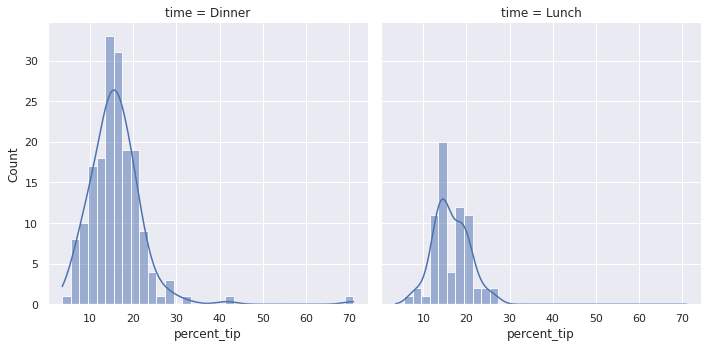

In [66]:
sns.displot(data=tips, x="percent_tip", col="time", kde=True)

Now let us convert size, smoker, sex and day to category rather than numeric and object. 

Previously, size was an integer, which allowed us to calculate the correlation between size and percent-tip for the correlation analysis,

Now, we can treat size as a categorical variable instead, which is useful for bar plots. 

In [ ]:
tips['size'] = tips['size'].astype("category")
tips['smoker'] = tips['smoker'].astype("category")
tips['sex'] = tips['sex'].astype("category")
tips['day'] = tips['day'].astype("category")

### Statistical Estimates

Using seaborn, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using ```lmplot```. The linear regression gives better visualization than just the scatterplot.

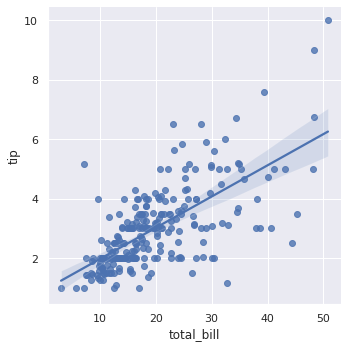

In [67]:
sns.lmplot(data=tips, x="total_bill", y="tip")

The plot above shows that tips increase with total bill. We can also see if the trend differs among smokers and non-smokers and also vary according to time of the meal. 

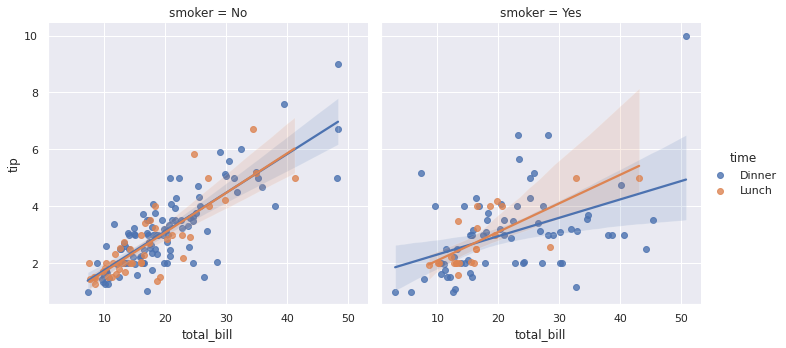

In [69]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="smoker", hue = "time")

## Specialized Plots for Categorical Data

The ```catplot``` function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The ```kind``` parameter selects the underlying axes-level function to use. 

Selecting ```kind="swarm"``` creates a swarm plot, which allows visualizing individual observation. It is essentially a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap.

Suppose we want to visualize the pattern of the tips across days of week and the time that they dine. 

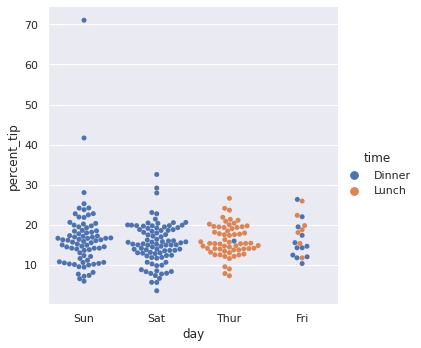

In [70]:
sns.catplot(data=tips, kind="swarm", x="day", y="percent_tip", hue="time")

Selecting ```kind="violin"``` creates a violin plot, which allows visualizing the distribution of quantitative data across several levels of one (or more) categorical variables.

Suppose we want to visualize the pattern of the tippers across days of week and whether or not they smoke. 

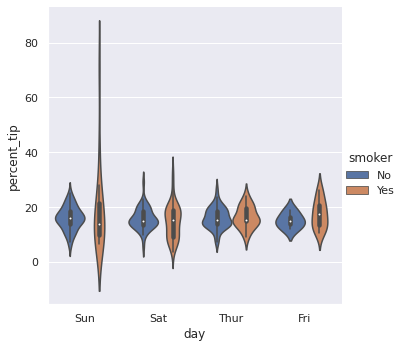

In [71]:
sns.catplot(data=tips, kind="violin", x="day", y="percent_tip", hue="smoker")

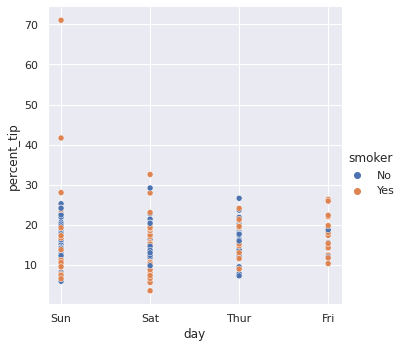

In [72]:
sns.relplot(data=tips, x="day", y="percent_tip", hue="smoker")

Similar to the violin plot is the bar plot.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. It can be plotted using ```barplot``` or using ```kind="bar"``` when plotting categorical variable using ```catplot```.

Is there a relationship between percent-tip and the group size? Also, do the smokers tend to be better or worse tippers when alone vs when in groups? We can visualise all these using a bar plot.

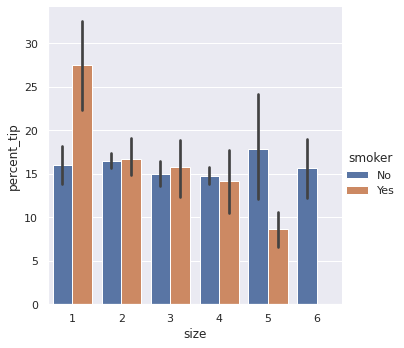

In [73]:
sns.catplot(data=tips, kind="bar", x="size", y="percent_tip", hue="smoker")

Similarly we can see if the pattern various across the gender, and if the females or males, tend to be better tippers? Does this change with group size?

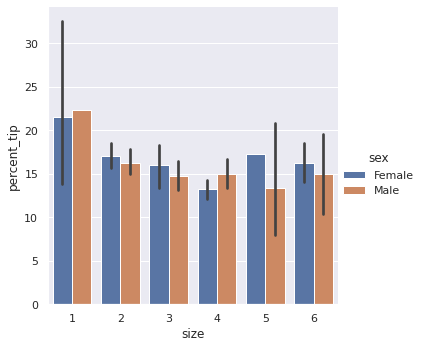

In [74]:
sns.catplot(data=tips, kind="bar", x="size", y="percent_tip", hue="sex")

Are there more smokers during lunch or dinner?


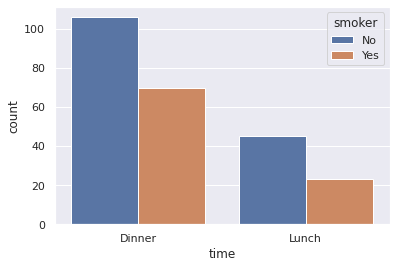

In [75]:
sns.countplot(data=tips, x="time", hue="smoker")

Do waiters tend to get better tips during dinner or lunch? We can get some visual understanding of the descriptive statistics of the four numeric columns using a ```boxplot```. A boxplot is a method for graphically depicting groups of numerical data through their quartiles.

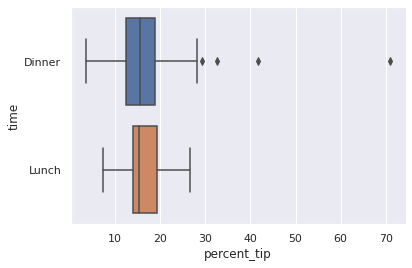

In [76]:
sns.boxplot(data=tips, y="time", x="percent_tip", orient="h")

## Visualization on Multivariate Dataset

Let us load another classic dataset, available in seaborn too - IRIS dataset. The data is about 3 types of iris plants, and some features regarding samples of these plants. We load this dataset as it has more numeric columns and they are separable with the classes.

In [77]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

We can get some visual understanding of the descriptive statistics of the four numeric columns using a ```boxplot```. 

In [80]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


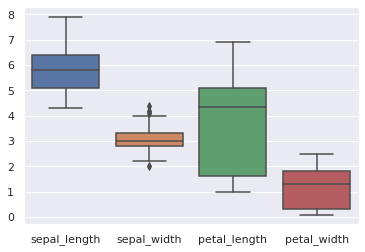

In [79]:
sns.boxplot(data=iris)

Similar to previous dataset, we can view the correlation heatmap and joint distribution between two highly correlated columns. 

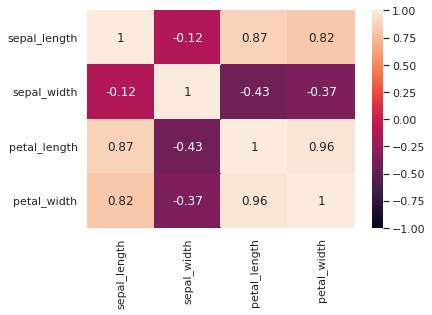

In [81]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True)

Notice that the diagonals are always 1 and the heatmap is symmetrical along the diagonal. We only use half of the heatmap. Is there a way to only reflect half the heatmap?

[[1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]


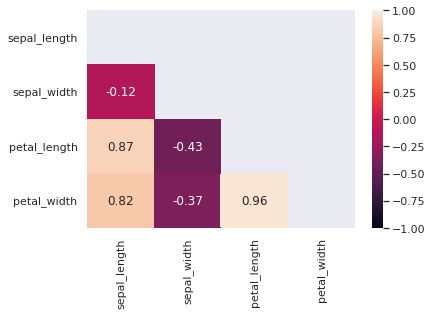

In [83]:
import numpy as np
mask = np.triu(np.ones_like(iris.corr()))
print(mask)
sns.heatmap(iris.corr(), mask = mask, vmin=-1, vmax=1, annot=True)

We can view a joint distribution on petal width and length of the three species to see if the values look different for different species. 

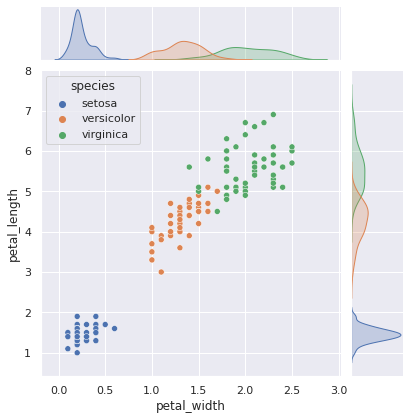

In [84]:
sns.jointplot(data=iris, x="petal_width", y="petal_length", hue="species")

The ```jointplot``` focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution.

The ```pairplot``` on the other hand, shows joint and marginal distributions for all pairwise relationships and for each variable, respectively. 

The plots along the diagonal of the pairplot are univariate distribution plots. 

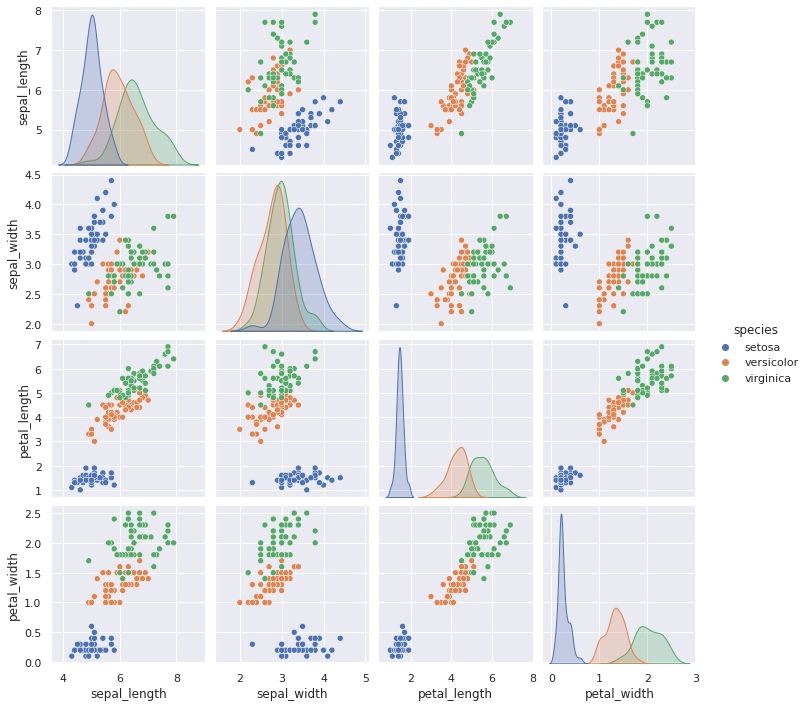

In [85]:
sns.pairplot(data=iris, hue="species")

Such plots help to understand the importance of adding third dimension in our visualization. If we just view the correlations and two dimensional visualization, we may not be able to distinguish between the various species. 

## Multiple seaborn plots

We can integrate the seaborn plots with the matplotlib subplots too. The axes-level functions of seaborn accept an ```ax=``` argument which lets us specify where the plot should be placed. We can plot two different plots from two different datasets side-by-side. This is generally useful, when we want to plot graphs for presentations and publications and need comparitive analysis. 

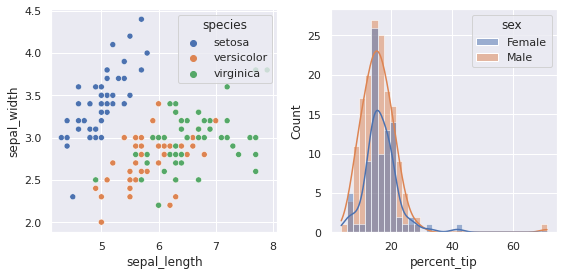

In [93]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[2, 2]))
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", ax=axs[0])
sns.histplot(data=tips, x="percent_tip", hue="sex", kde=True, ax=axs[1])
f.tight_layout()

# Visualizing Geographic Data on Map

Geographic data is essentiall points defined by latitude and longitude. So, we can plot it using scatterplot, and overlay on the desired map. It is important here to set the x-axis and y-axis limits so that the scatter plot accurately plots the data on the image. 

Remember that the x-axis is given by the longitude values and y-axis is given by latitutde values.

Let us load the map image for NUS available from openstreetmap.org. The bounding box for this image in terms of latitutde and longitude is:
```[1.2897 1.3091 ]```
```[103.7678 103.7853]```

Let us map the point for ERC in UTown is: (1.306391, 103.773113).


In [94]:
nus_map = plt.imread("/content/drive/MyDrive/Colab Notebooks/IT5006/Week 3/map.png")

BBox = [103.7678, 103.7853, 1.2897, 1.3091] # singapore is approximately 1.3521° N, 103.8198° E


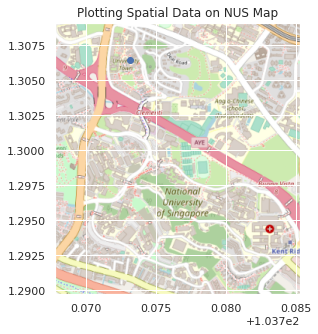

In [96]:
fig, ax = plt.subplots(figsize = (6,5))

ax.imshow(nus_map, zorder=0, extent=BBox, aspect="equal") #zorder is the order that objects in the plot are placed
ax.set_title('Plotting Spatial Data on NUS Map')
ax.scatter(103.773113, 1.306391)

plt.show()